<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: spec2, barshadow step

<span style="color:red"> **Instruments Affected**</span>: NIRSpec 

Tested on CV3 data

### Table of Contents
<div style="text-align: left"> 

<br> [Imports](#imports_ID) <br> [Introduction](#intro_ID) <br> [Testing Data Set](#data_ID) <br> [Run the JWST pipeline and assign_wcs validation tests](#pipeline_ID): [FS Full-Frame test](#FULLFRAME), [FS ALLSLITS test](#ALLSLITS), [MOS test](#MOS) <br> [About This Notebook](#about_ID)<br> [Results](#results) <br>

</div>

<a id="imports_ID"></a>
# Imports
The library imports relevant to this notebook are aready taken care of by importing PTT.

* astropy.io for opening fits files
* jwst.module.PipelineStep is the pipeline step being tested
* matplotlib.pyplot.plt to generate plot

NOTE: This notebook assumes that the pipeline version to be tested is already installed and its environment is activated.

To be able to run this notebook you need to install nptt. 

If all goes well you will be able to import PTT.

[Top of Page](#title_ID)

In [1]:
import os
from astropy.io import fits

import jwst
from jwst.barshadow import BarShadowStep
from jwst import datamodels

# The latest version of NPTT is installed in the requirements text file at:
# /jwst_validation_notebooks/requirements.txt

# import NPTT
import nirspec_pipe_testing_tool as nptt

In [2]:
# VERSIONS

# print the jwst pipeline version
print("Using JWST pipeline version: ", jwst.__version__)

# Make sure that the version used is the right one

# to get the latest version from 'master' run:
# subprocess.run(['pip', 'install', 'git+https://github.com/spacetelescope/nirspec_pipe_testing_tool@master'])

latest_nptt_stable_version = '1.1.1'
nptt_version = nptt.__version__

if nptt_version != latest_nptt_stable_version:
    print("\n* WARNING - The code might break because the version used is not the latest stable version:")
    print("            Latest stable version is ", latest_nptt_stable_version)
    print("            Using NPTT version ", nptt_version)

Using JWST pipeline version:  0.16.2

* WARNING - The code might break because the version used is not the latest stable version:
            Latest stable version is  1.1.1
            Using NPTT version  1.1.1.dev4+gb2081e9


<a id="intro_ID"></a>
# Introduction

The NIRSpec team implemented code for the barshadow step and then compared the output with the the pipeline. The test is considered passed if the difference between the two outputs is smaller than 5%, the error provided by the IDT team (or 0.0025 in absolute numbers). 

For the test to be considered PASSED, every single MOS slitlet has to pass. If there is any failure, the whole test will be considered as FAILED. 

The code for this test can be obtained from: https://github.com/spacetelescope/nirspec_pipe_testing_tool/blob/master/nirspec_pipe_testing_tool/calwebb_spec2_pytests/auxiliary_code/barshadow_testing.py. 


Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/barshadow/description.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/barshadow


### Calibration WG Requested Algorithm: 

A short description and link to the page: https://outerspace.stsci.edu/pages/viewpage.action?spaceKey=JWSTCC&title=Vanilla+MSA+Bar+Shadow+Correction


### Defining Term
Acronymns used un this notebook:

pipeline: calibration pipeline

spec2: spectroscopic calibration pipeline level 2b

PTT: NIRSpec pipeline testing tool (https://github.com/spacetelescope/nirspec_pipe_testing_tool)


[Top of Page](#title_ID)

<a id="data_ID"></a>
# Testing Data Set

All testing data is from the CV3 campaign. We chose these files because this is our most complete data set, i.e. all modes and filter-grating combinations.

Data used was for testing was only FS and MOS, since extract_2d is skipped for IFU. Data sets are:
- MOS_G140M_LINE1 
- MOS_PRISM

The testing data can be located at ``path_to_nirspec_vault/prelaunch_data/testing_sets/b7.1_pipeline_testing/test_data_suite```

In that directory you will find a subdirectory for CV3 data for FS, MOS, and IFU, as well as other campaigns. This notebook is specifically written for CV3 data.



[Top of Page](#title_ID)

<a id="pipeline_ID"></a>
# Run the JWST pipeline and pathloss validation tests

The pipeline can be run from the command line in two variants: full or per step.

Tu run the spec2 pipeline in full use the command: 

$ strun jwst.pipeline.Spec2Pipeline jwtest_rate.fits

Tu only run the barshadow step, use the command:

$ strun jwst.barshadow.BarShadowStep jwtest_previous_step_output.fits


These options are also callable from a script with the testing environment active. The Python call for running the pipeline in full or by step are:

$\gt$ from jwst.pipeline.calwebb_spec2 import Spec2Pipeline

$\gt$ Spec2Pipeline.call(jwtest_rate.fits)
 
or
 
$\gt$ from jwst.barshadow import BarShadowStep
 
$\gt$ BarShadowStep.call(jwtest_previous_step_output.fits)


PTT can run the spec2 pipeline either in full or per step, as well as the imaging pipeline in full. In this notebook we will use PTT to run the pipeline and the validation tests. To run PTT, follow the directions in the corresponding repo page.

[Top of Page](#title_ID)

-> For each mode, the following variables will need to be set:

- output_directory = path where you want intermediary files and plots to be saved in

- input_file = this is the previous step file, e.g. jwtest1_NRS1_source_type.fits

- mode_used = supported modes are: FS, MOS, IFU, BOTS, MOS_sim, dark, image, confirm, taconfirm, wata, msata, focus, mimf

- raw_data_root_file = CV3 raw data file


<a id="Common_variables"></a>
# Common Variables

In [3]:
# Set common variables for entire notebook

# paths
test_data_path = '/Users/pena/Documents/PyCharmProjects/nirspec/pipeline/testing_data'
WIT4_PATH = os.environ.get('WIT4_PATH')

# accepted threshold difference with respect to benchmark files
barshadow_threshold_diff = 0.0025

# other variables
write_barshadow_files = False
show_final_fig = True
save_final_fig = False
show_intermediary_figs = False
save_intermediary_figs = False

<a id="MOS"></a>
# MOS test

In [4]:
# Set the variables 
data_directory = os.path.join(test_data_path, 'MOS/G140M_LINE1')
prev_step_file = os.path.join(data_directory, 'final_output_caldet1_NRS1_pathloss.fits')
mode_used = 'MOS'
pipeline_barshadow_file = prev_step_file.replace('pathloss', 'barshadow')

In [5]:
# Run the pipeline step
pipe_result = BarShadowStep.call(prev_step_file)

2020-09-28 15:28:39,161 - CRDS - ERROR -  Error determining best reference for 'pars-barshadowstep'  =   Unknown reference type 'pars-barshadowstep'
2020-09-28 15:28:39,167 - stpipe.BarShadowStep - INFO - BarShadowStep instance created.
2020-09-28 15:28:39,499 - stpipe.BarShadowStep - INFO - Step BarShadowStep running with args ('/Users/pena/Documents/PyCharmProjects/nirspec/pipeline/testing_data/MOS/G140M_LINE1/final_output_caldet1_NRS1_pathloss.fits',).
2020-09-28 15:28:39,501 - stpipe.BarShadowStep - INFO - Step BarShadowStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-09-28 15:29:00,470 - stpipe.BarShadowStep - INFO - Using BARSHADOW reference file /Users/pena/crds_cache/references/jwst/nirspec/jwst_nirspec_barshadow_0001.fits
2020-09-28 15:29:10,563 - stpi

In [6]:
# Obtain other the information

# determine the type of source from the science header, choose the first science extension
srouce_type = fits.getval(prev_step_file, "SRCTYPE", "SCI", 1)
print('This data set has source type = ', srouce_type)

# get the corresponding reference file from the file just ran through the pipeline, the comparison data 
reffile = pipe_result.meta.ref_file.pathloss.name.replace("crds://", "")
ref_file = os.path.join(os.environ.get('CRDS_PATH'), 'references/jwst/nirspec/'+reffile)


This data set has source type =  EXTENDED


Checking if files exist and obtaining datamodels, this takes a few minutes...


2020-09-28 15:29:34,567 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:34,569 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



Looping over open slitlets...
Working with slitlet  53
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference file used for barshadow calculation: /grp/jwst/wit4/nirspec/CDP3/05_Other_Calibrations/5.3_BarShadow/referenceFilesBS-20160401/jwst-nirspec-mos1x1.bsrf.fits
Calculation of barshadow correction done.
nan nan
Creating final barshadow test plot...


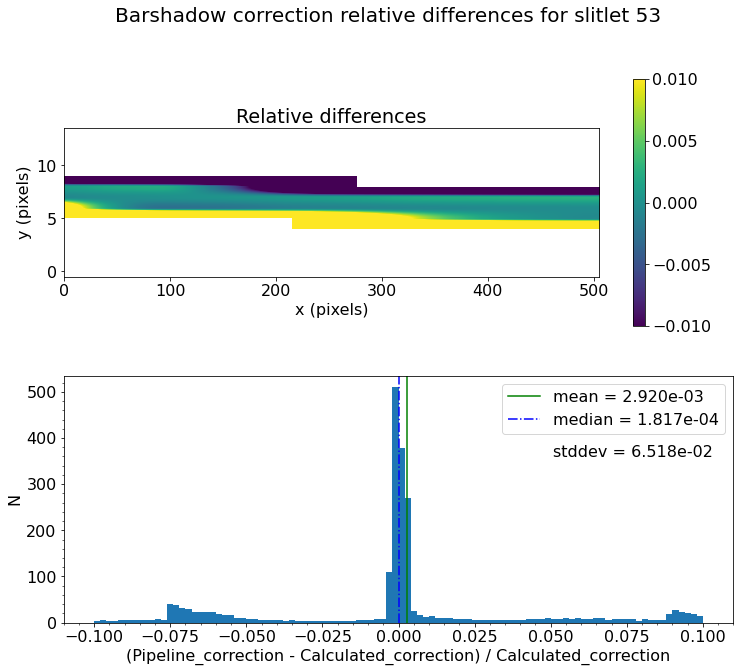

2020-09-28 15:29:37,698 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:37,698 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:37,777 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:37,777 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)




   Relative barshadow_correction  :   mean = 2.920e-03    median = 1.817e-04    stdev = 6.518e-02
    Maximum   Relativebarshadow_correction = 2.089e-01
    Minimum   Relativebarshadow_correction = -1.949e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 57%
                            ->  3xtheshold = 49%
                            ->  5xtheshold = 47%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 53? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  54
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

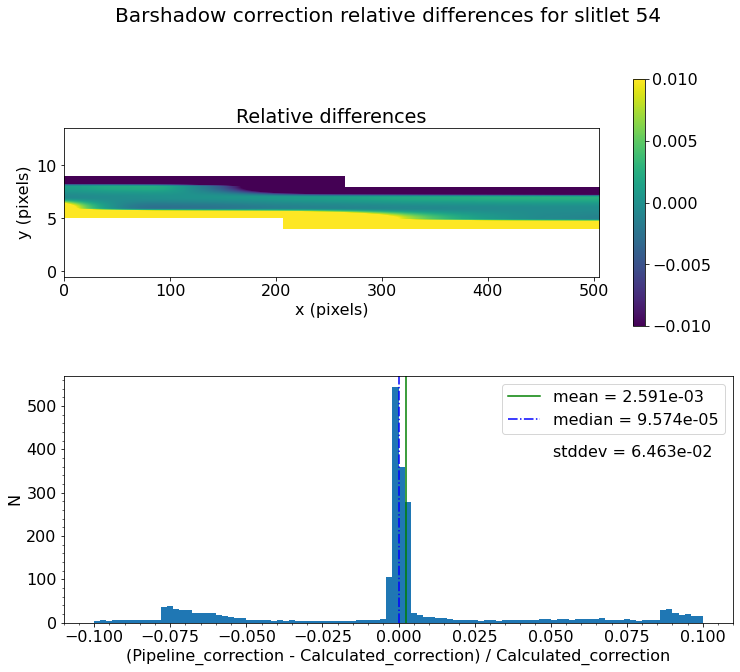

2020-09-28 15:29:40,348 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:40,349 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:40,416 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:40,416 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:40,418 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 2.591e-03    median = 9.574e-05    stdev = 6.463e-02
    Maximum   Relativebarshadow_correction = 2.090e-01
    Minimum   Relativebarshadow_correction = -1.946e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 57%
                            ->  3xtheshold = 48%
                            ->  5xtheshold = 47%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 54? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  42
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

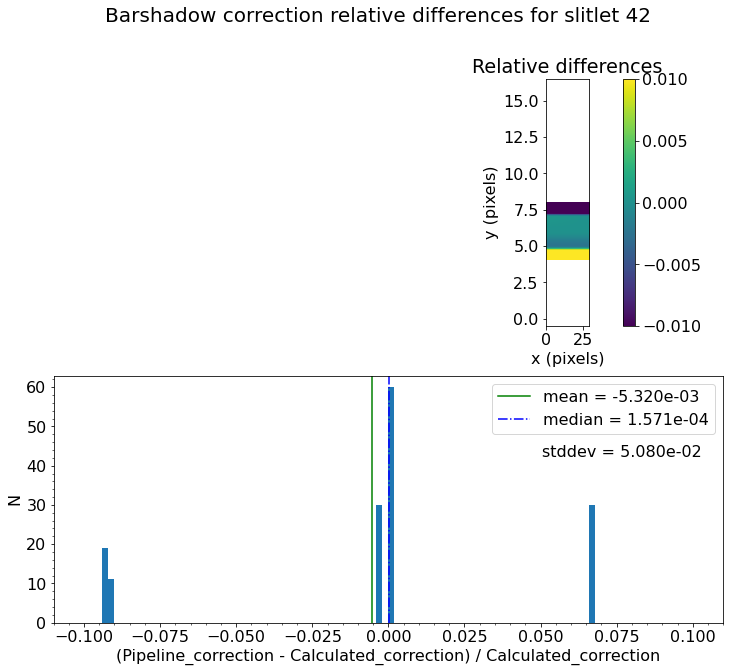

2020-09-28 15:29:42,403 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:42,403 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:42,405 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:42,405 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:42,469 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = -5.320e-03    median = 1.571e-04    stdev = 5.080e-02
    Maximum   Relativebarshadow_correction = 6.773e-02
    Minimum   Relativebarshadow_correction = -9.282e-02
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 40%
                            ->  3xtheshold = 40%
                            ->  5xtheshold = 40%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 42? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  43
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference

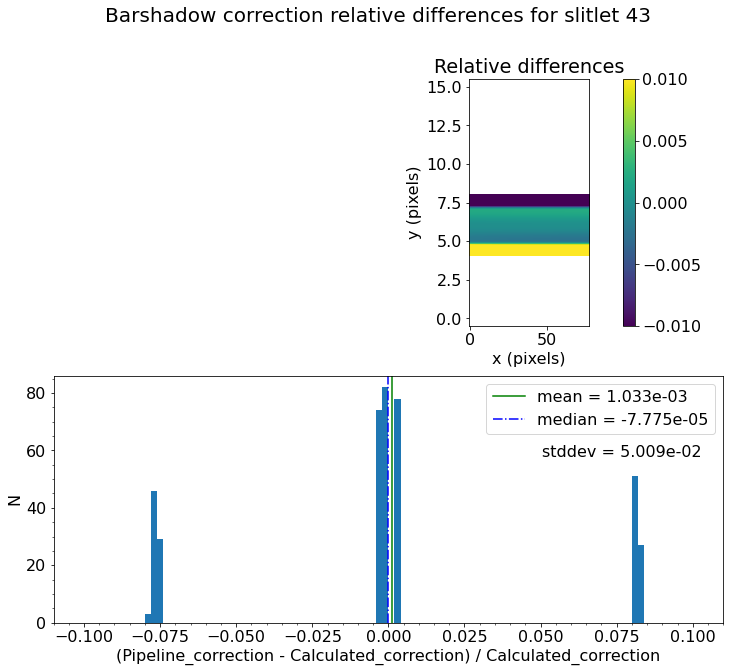

2020-09-28 15:29:44,379 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:44,380 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:44,383 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:44,383 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:44,454 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 1.033e-03    median = -7.775e-05    stdev = 5.009e-02
    Maximum   Relativebarshadow_correction = 8.399e-02
    Minimum   Relativebarshadow_correction = -7.807e-02
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 40%
                            ->  3xtheshold = 40%
                            ->  5xtheshold = 40%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 43? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  44
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference

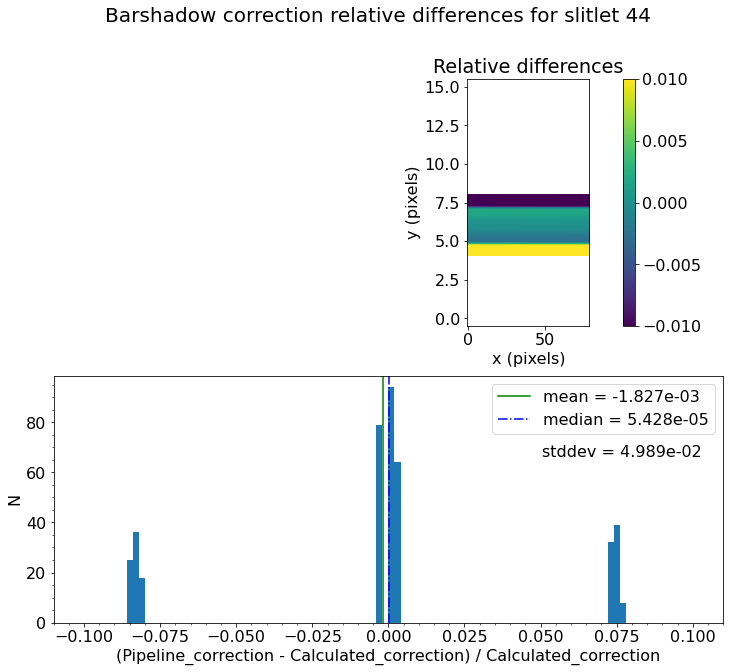

2020-09-28 15:29:46,480 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:46,481 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:46,483 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:46,484 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:46,575 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = -1.827e-03    median = 5.428e-05    stdev = 4.989e-02
    Maximum   Relativebarshadow_correction = 7.626e-02
    Minimum   Relativebarshadow_correction = -8.489e-02
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 60%
                            ->  3xtheshold = 40%
                            ->  5xtheshold = 40%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 44? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  45
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference

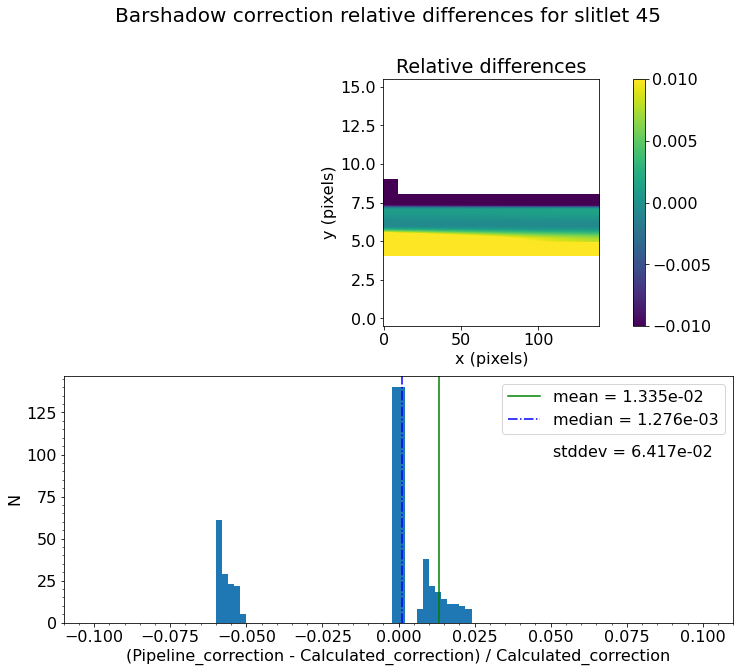

2020-09-28 15:29:48,758 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:48,759 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:48,760 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:48,761 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:48,839 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 1.335e-02    median = 1.276e-03    stdev = 6.417e-02
    Maximum   Relativebarshadow_correction = 1.400e-01
    Minimum   Relativebarshadow_correction = -1.996e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 61%
                            ->  3xtheshold = 61%
                            ->  5xtheshold = 50%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 45? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  46
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

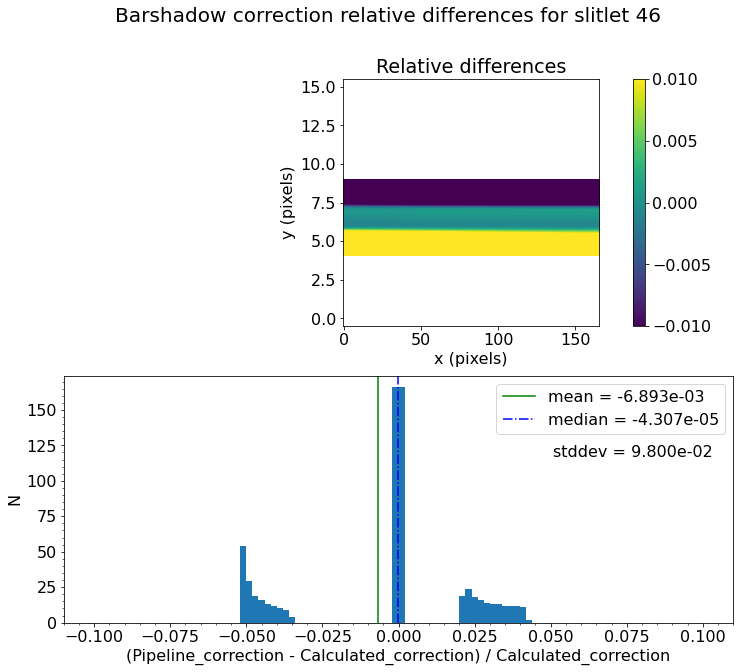

2020-09-28 15:29:50,792 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:50,793 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:50,794 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:50,795 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:50,855 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = -6.893e-03    median = -4.307e-05    stdev = 9.800e-02
    Maximum   Relativebarshadow_correction = 1.819e-01
    Minimum   Relativebarshadow_correction = -1.932e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 67%
                            ->  3xtheshold = 67%
                            ->  5xtheshold = 67%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 46? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  47
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

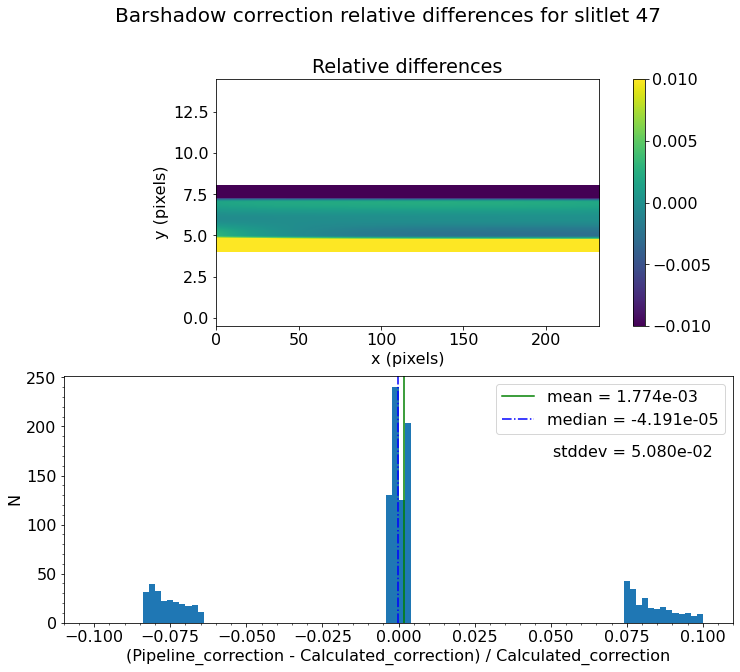

2020-09-28 15:29:52,810 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:52,810 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:52,812 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:52,812 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:52,868 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 1.774e-03    median = -4.191e-05    stdev = 5.080e-02
    Maximum   Relativebarshadow_correction = 1.030e-01
    Minimum   Relativebarshadow_correction = -8.340e-02
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 48%
                            ->  3xtheshold = 40%
                            ->  5xtheshold = 40%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 47? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  48
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference

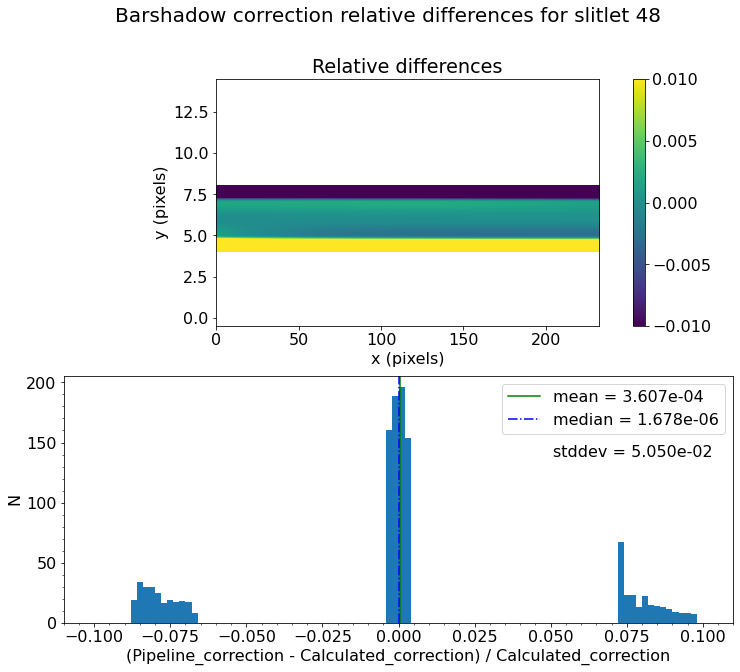

2020-09-28 15:29:55,535 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:55,536 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:55,537 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:55,537 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:55,599 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 3.607e-04    median = 1.678e-06    stdev = 5.050e-02
    Maximum   Relativebarshadow_correction = 9.792e-02
    Minimum   Relativebarshadow_correction = -8.700e-02
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 51%
                            ->  3xtheshold = 40%
                            ->  5xtheshold = 40%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 48? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  49
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

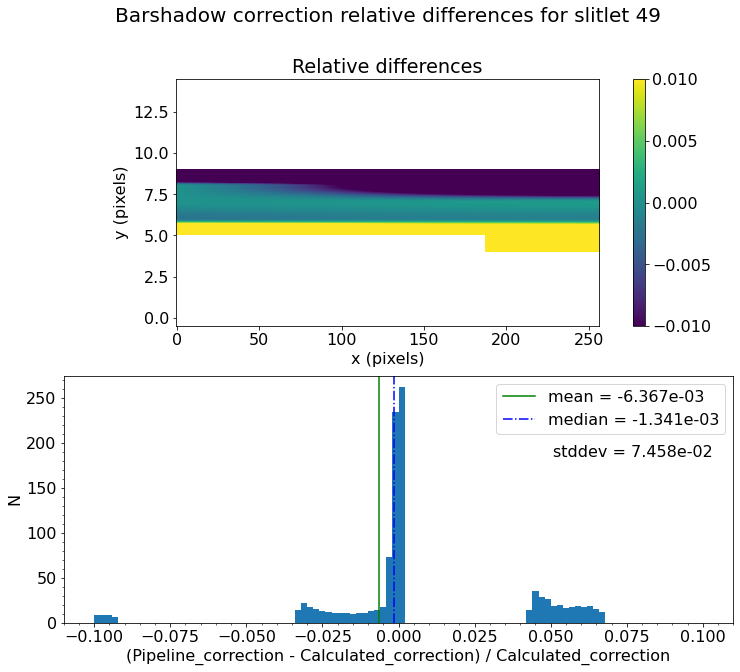

2020-09-28 15:29:57,622 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:57,623 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:57,624 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:57,625 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:57,695 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = -6.367e-03    median = -1.341e-03    stdev = 7.458e-02
    Maximum   Relativebarshadow_correction = 2.094e-01
    Minimum   Relativebarshadow_correction = -1.496e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 56%
                            ->  5xtheshold = 54%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 49? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  50
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

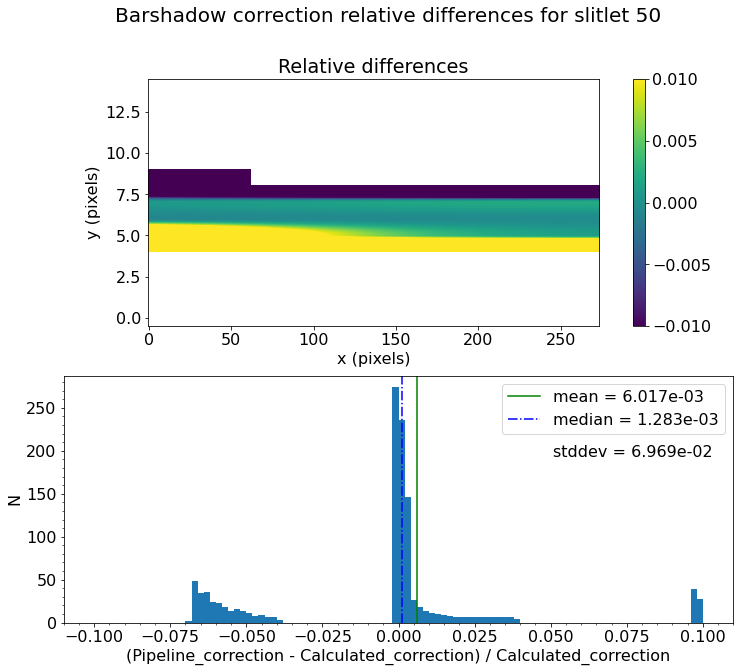

2020-09-28 15:29:59,897 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:59,898 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:59,899 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:29:59,900 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:29:59,973 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 6.017e-03    median = 1.283e-03    stdev = 6.969e-02
    Maximum   Relativebarshadow_correction = 1.722e-01
    Minimum   Relativebarshadow_correction = -1.987e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 57%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 50? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  51
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

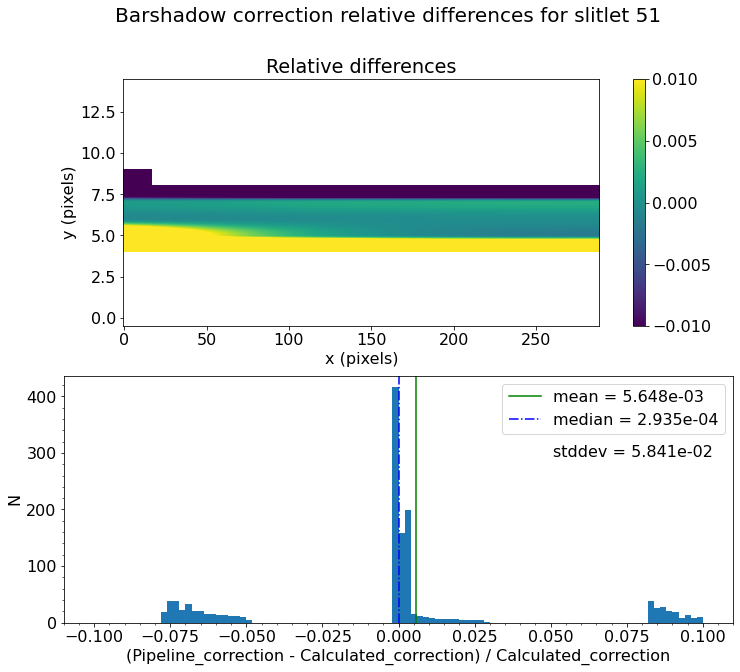

2020-09-28 15:30:02,082 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:02,083 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:30:02,084 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:02,084 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:30:02,151 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 5.648e-03    median = 2.935e-04    stdev = 5.841e-02
    Maximum   Relativebarshadow_correction = 1.468e-01
    Minimum   Relativebarshadow_correction = -1.986e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 48%
                            ->  3xtheshold = 45%
                            ->  5xtheshold = 44%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 51? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  52
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

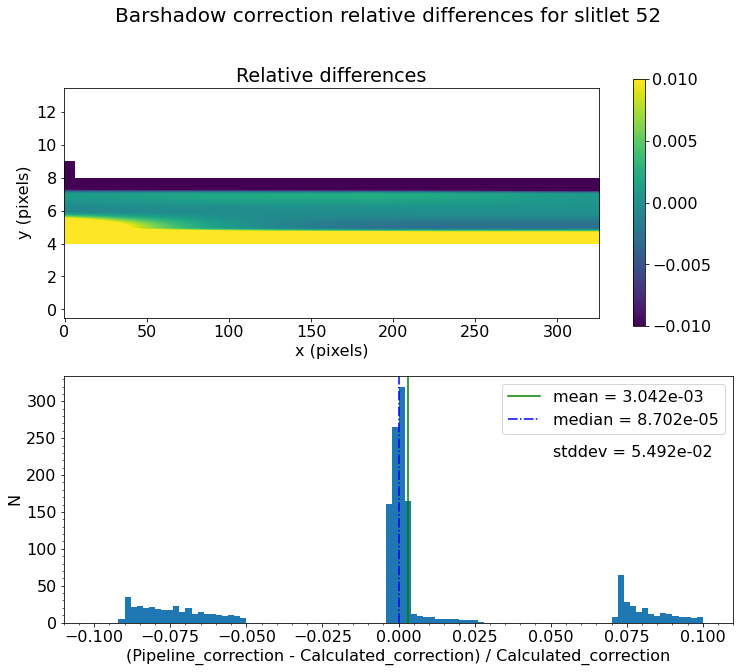

2020-09-28 15:30:04,049 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:04,049 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:30:04,051 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:04,051 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)

2020-09-28 15:30:04,127 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packa


   Relative barshadow_correction  :   mean = 3.042e-03    median = 8.702e-05    stdev = 5.492e-02
    Maximum   Relativebarshadow_correction = 1.446e-01
    Minimum   Relativebarshadow_correction = -1.992e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 53%
                            ->  3xtheshold = 43%
                            ->  5xtheshold = 42%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 52? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  55
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

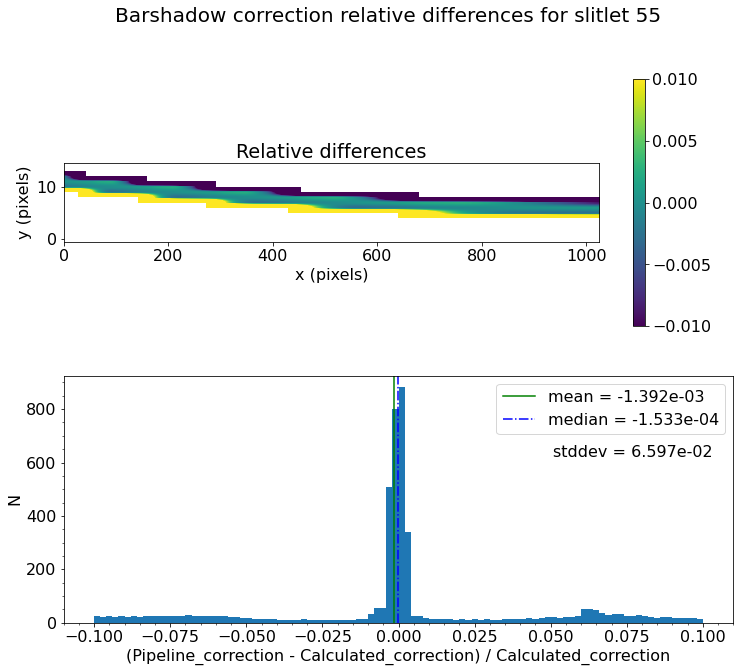

2020-09-28 15:30:06,070 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:06,070 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)




   Relative barshadow_correction  :   mean = -1.392e-03    median = -1.533e-04    stdev = 6.597e-02
    Maximum   Relativebarshadow_correction = 2.116e-01
    Minimum   Relativebarshadow_correction = -1.975e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 49%
                            ->  5xtheshold = 47%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 55? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  65
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

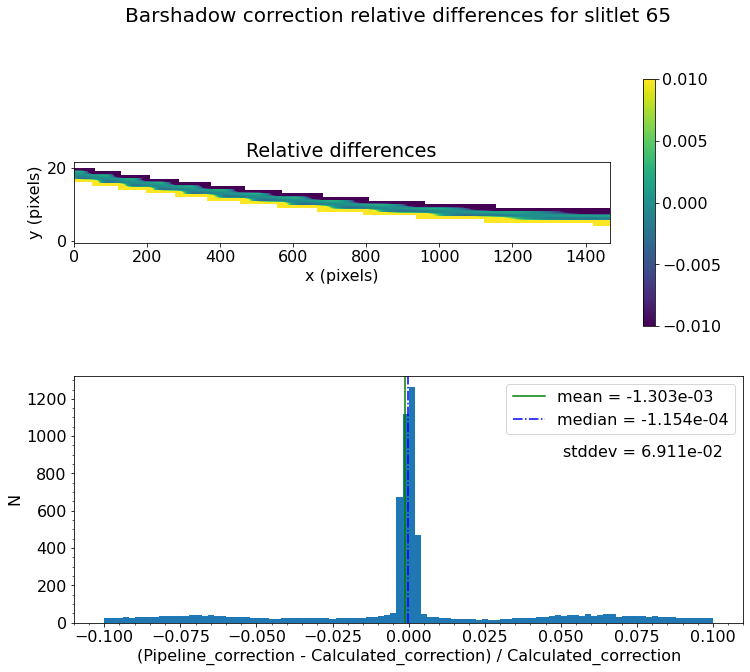


   Relative barshadow_correction  :   mean = -1.303e-03    median = -1.154e-04    stdev = 6.911e-02
    Maximum   Relativebarshadow_correction = 2.108e-01
    Minimum   Relativebarshadow_correction = -1.988e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 52%
                            ->  5xtheshold = 50%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 65? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  66
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

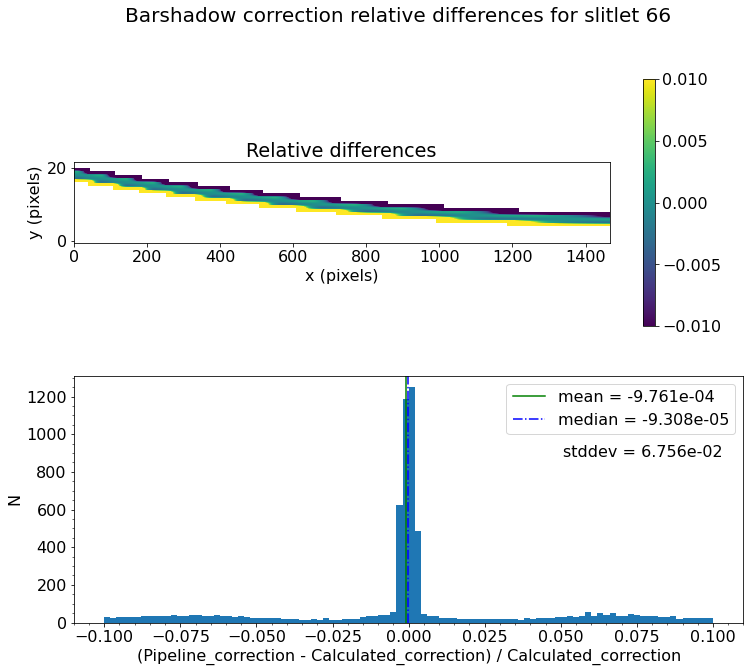


   Relative barshadow_correction  :   mean = -9.761e-04    median = -9.308e-05    stdev = 6.756e-02
    Maximum   Relativebarshadow_correction = 2.078e-01
    Minimum   Relativebarshadow_correction = -1.960e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 58%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 66? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  68
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

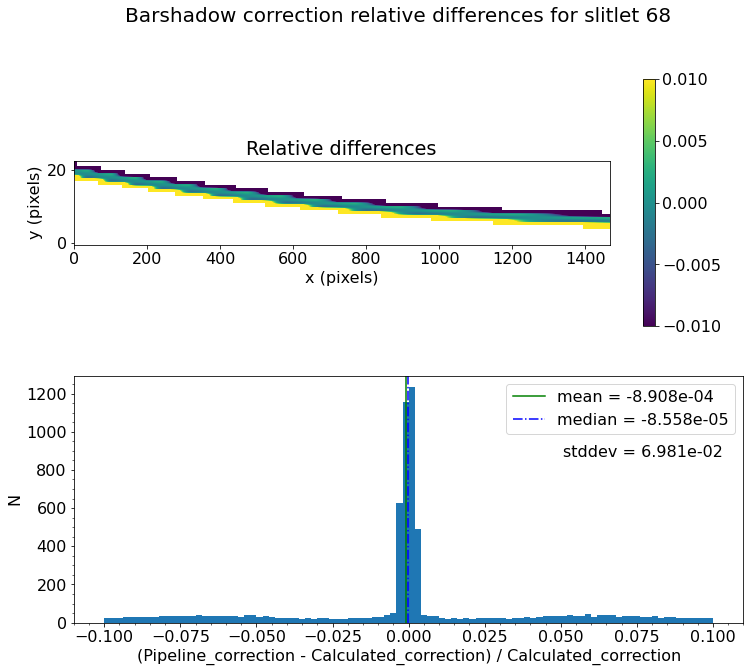

2020-09-28 15:30:13,252 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:13,253 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)




   Relative barshadow_correction  :   mean = -8.908e-04    median = -8.558e-05    stdev = 6.981e-02
    Maximum   Relativebarshadow_correction = 2.105e-01
    Minimum   Relativebarshadow_correction = -1.961e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 52%
                            ->  5xtheshold = 50%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 68? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  56
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

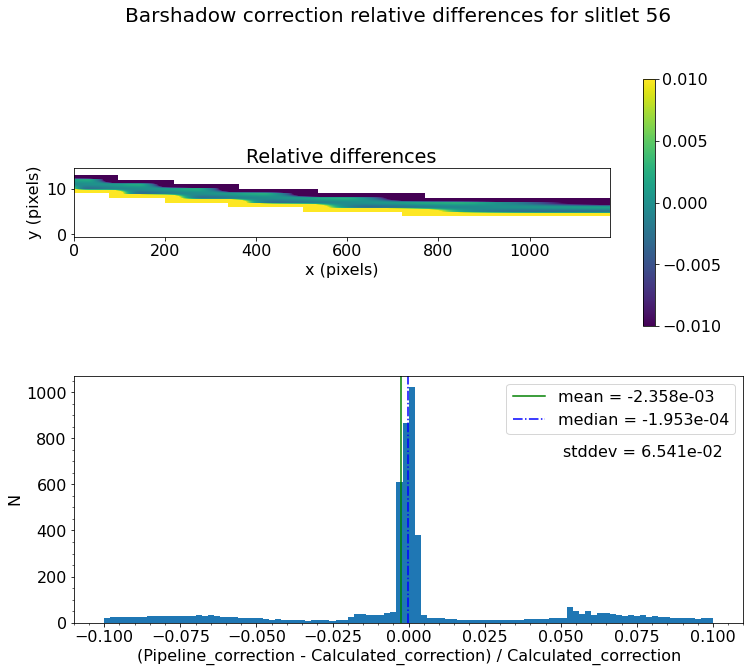

2020-09-28 15:30:15,197 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

2020-09-28 15:30:15,197 - stpipe - WARNING - /Users/pena/anaconda3/envs/jwst162/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)




   Relative barshadow_correction  :   mean = -2.358e-03    median = -1.953e-04    stdev = 6.541e-02
    Maximum   Relativebarshadow_correction = 2.113e-01
    Minimum   Relativebarshadow_correction = -1.967e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 50%
                            ->  5xtheshold = 48%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 56? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  57
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

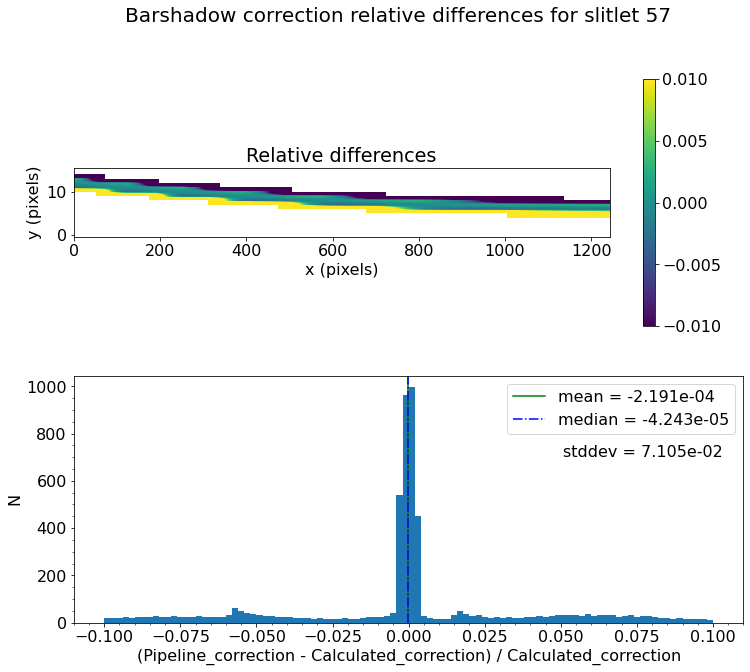


   Relative barshadow_correction  :   mean = -2.191e-04    median = -4.243e-05    stdev = 7.105e-02
    Maximum   Relativebarshadow_correction = 2.083e-01
    Minimum   Relativebarshadow_correction = -1.983e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 60%
                            ->  3xtheshold = 53%
                            ->  5xtheshold = 52%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 57? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  58
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

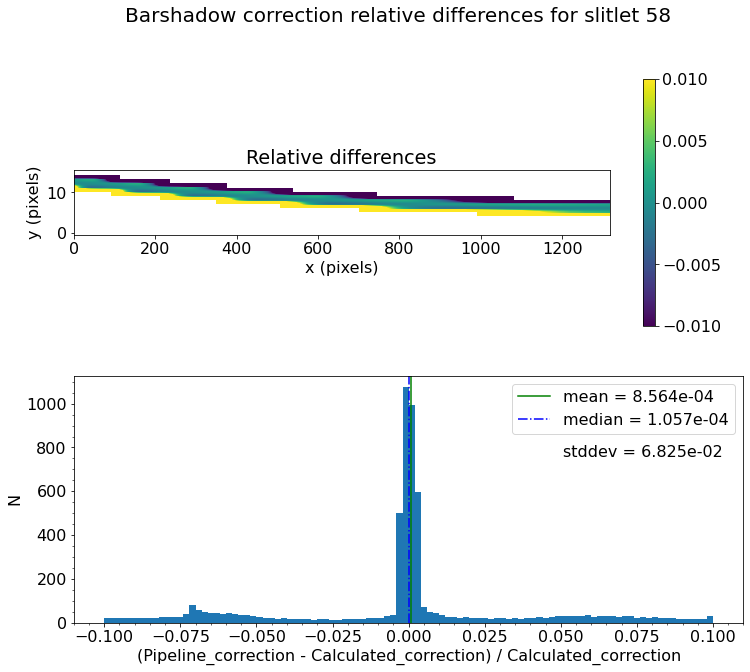


   Relative barshadow_correction  :   mean = 8.564e-04    median = 1.057e-04    stdev = 6.825e-02
    Maximum   Relativebarshadow_correction = 2.126e-01
    Minimum   Relativebarshadow_correction = -1.986e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 60%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 58? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  59
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

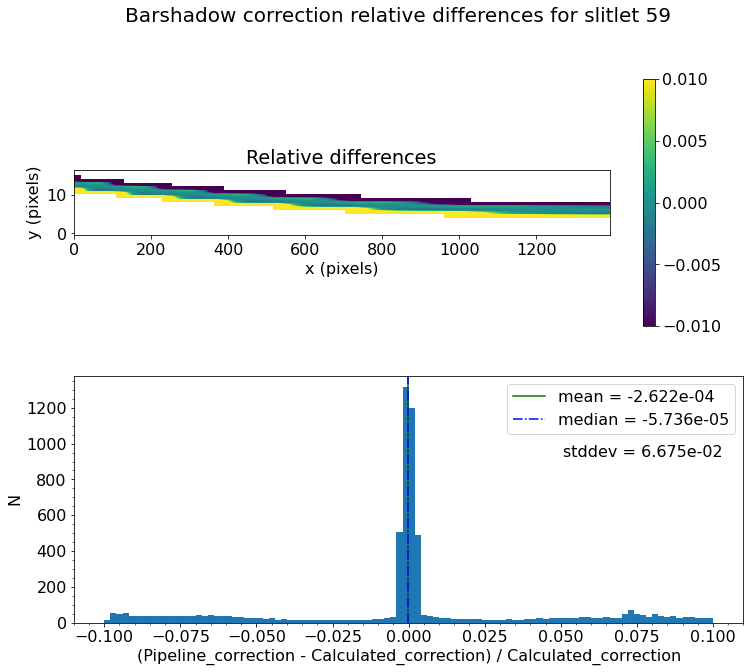


   Relative barshadow_correction  :   mean = -2.622e-04    median = -5.736e-05    stdev = 6.675e-02
    Maximum   Relativebarshadow_correction = 2.088e-01
    Minimum   Relativebarshadow_correction = -1.961e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 56%
                            ->  3xtheshold = 50%
                            ->  5xtheshold = 48%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 59? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  60
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

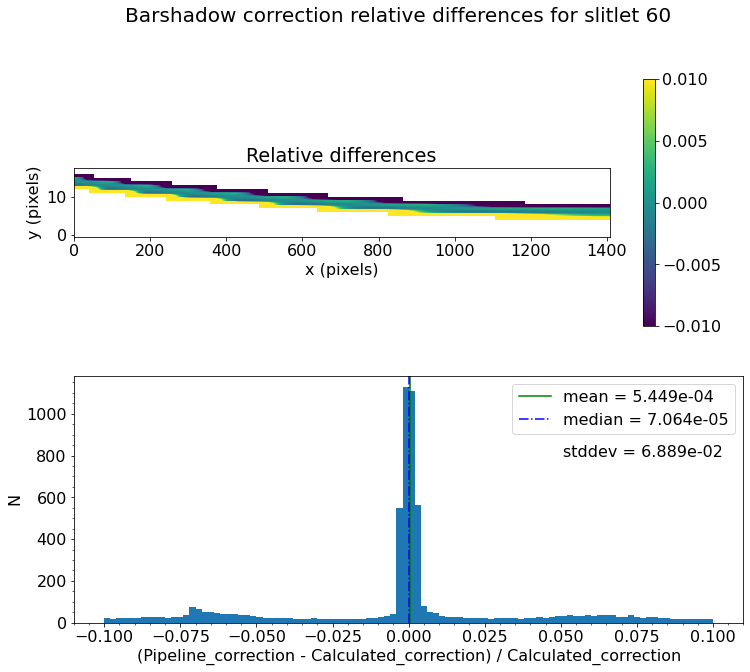


   Relative barshadow_correction  :   mean = 5.449e-04    median = 7.064e-05    stdev = 6.889e-02
    Maximum   Relativebarshadow_correction = 2.121e-01
    Minimum   Relativebarshadow_correction = -1.979e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 52%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 60? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  61
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

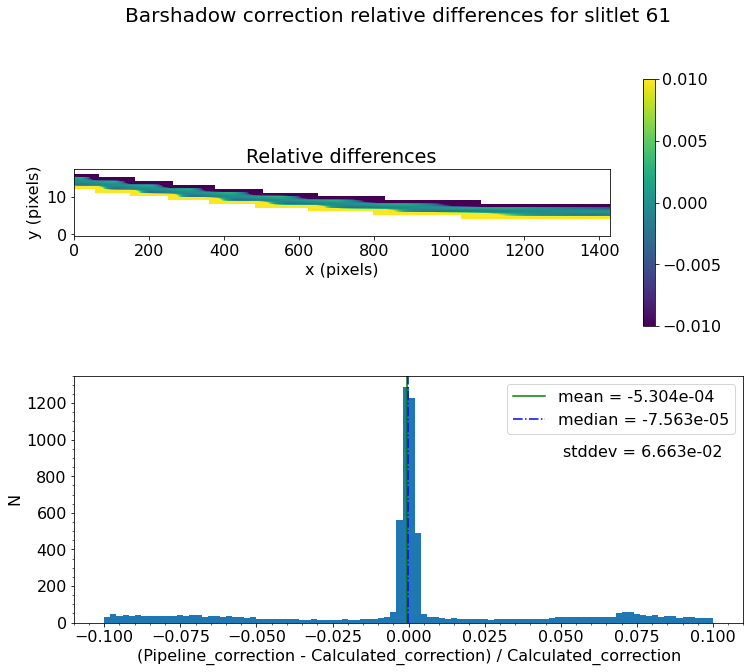


   Relative barshadow_correction  :   mean = -5.304e-04    median = -7.563e-05    stdev = 6.663e-02
    Maximum   Relativebarshadow_correction = 2.086e-01
    Minimum   Relativebarshadow_correction = -1.967e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 57%
                            ->  3xtheshold = 50%
                            ->  5xtheshold = 48%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 61? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  62
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

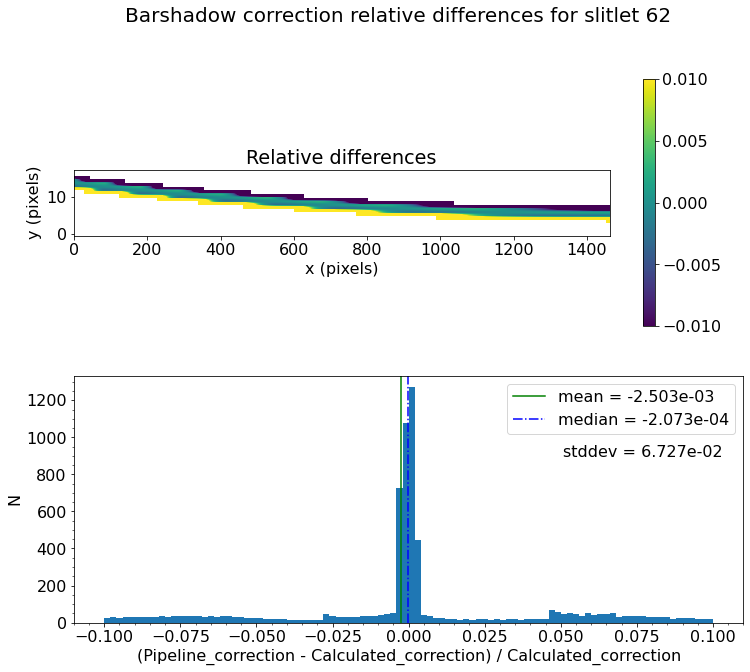


   Relative barshadow_correction  :   mean = -2.503e-03    median = -2.073e-04    stdev = 6.727e-02
    Maximum   Relativebarshadow_correction = 2.115e-01
    Minimum   Relativebarshadow_correction = -1.970e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 62? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  63
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Referenc

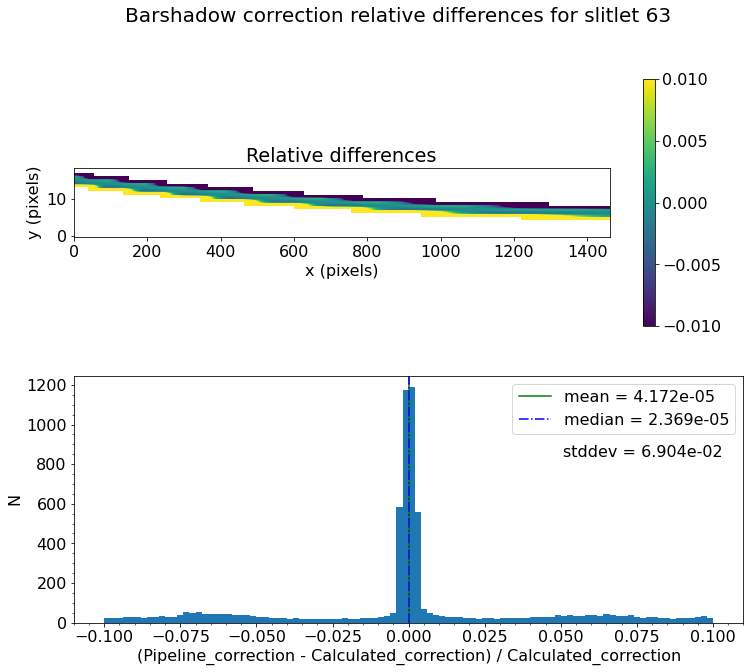


   Relative barshadow_correction  :   mean = 4.172e-05    median = 2.369e-05    stdev = 6.904e-02
    Maximum   Relativebarshadow_correction = 2.097e-01
    Minimum   Relativebarshadow_correction = -1.974e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 52%
                            ->  5xtheshold = 50%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 63? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  64
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

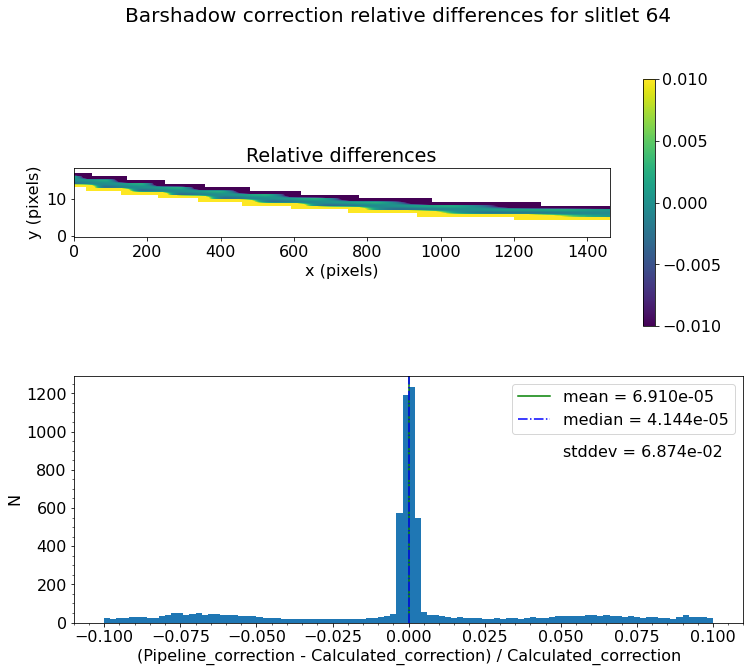


   Relative barshadow_correction  :   mean = 6.910e-05    median = 4.144e-05    stdev = 6.874e-02
    Maximum   Relativebarshadow_correction = 2.116e-01
    Minimum   Relativebarshadow_correction = -1.960e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 59%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 64? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED

Working with slitlet  67
Slitlet name in fits file previous to barshadow and in barshadow output file are the same.
Calculating barshadow correction...
Reference 

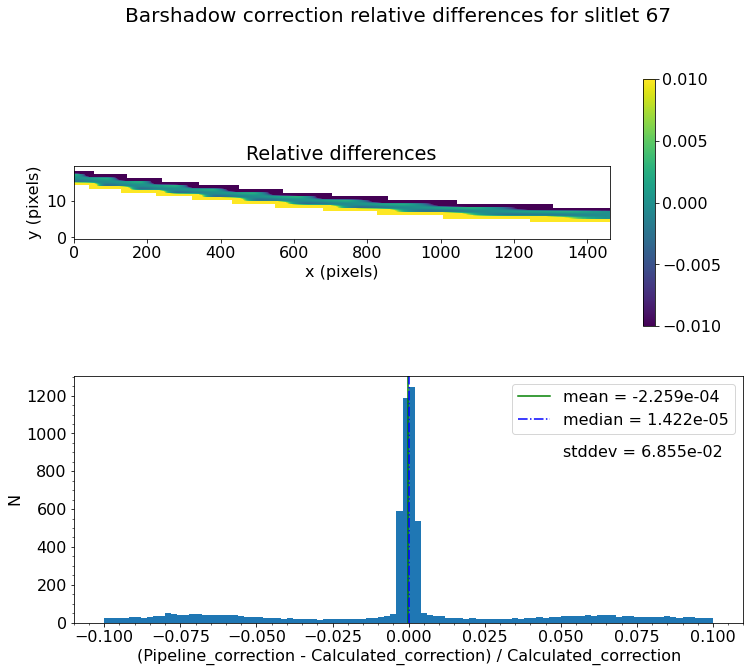


   Relative barshadow_correction  :   mean = -2.259e-04    median = 1.422e-05    stdev = 6.855e-02
    Maximum   Relativebarshadow_correction = 2.090e-01
    Minimum   Relativebarshadow_correction = -1.985e-01
    Percentage of pixels where median of relative differences is greater than: 
                            ->  1xtheshold = 58%
                            ->  3xtheshold = 51%
                            ->  5xtheshold = 49%

 *** WARNING: More than 10% of pixels have a median value greater than 3xthreshold!


 *** WARNING: More than 10% of pixels have a median value greater than 5xthreshold!

 * PASS/FAIL TEST: Is the median <= threshold for slit 67? PASSED

 * Result of number of points greater than 3*threshold greater than 10%: FAILED

 * Result of number of points greater than 5*threshold greater than 10%: FAILED


 * The test of barshadow_correction for slitlet 53  PASSED.

 * The test of barshadow_correction for slitlet 54  PASSED.

 * The test of barshadow_correction fo

In [7]:
# Run the validation test
%matplotlib inline

if "point" in srouce_type.lower():
    print('The test is skipped for POINT sources, since the correction is not applied')
    
elif "extend" in srouce_type.lower():
    _, result_msg, _ = nptt.calwebb_spec2_pytests.auxiliary_code.barshadow_testing.run_barshadow_tests(
                                                        prev_step_file, 
                                                        pipe_result,
                                                        barshadow_threshold_diff=barshadow_threshold_diff,
                                                        save_final_figs=save_final_fig,
                                                        show_final_figs=show_final_fig,
                                                        save_intermediary_figs=save_intermediary_figs,
                                                        show_intermediary_figs=show_intermediary_figs,
                                                        write_barshadow_files=write_barshadow_files)


In [8]:
# Quickly see if the test passed 
   
if "point" in srouce_type.lower():
   print('The test is skipped for POINT sources, since the correction is not applied')
else:
    print("Did assign_wcs validation for MOS test passed? ", result_msg)


Did assign_wcs validation for MOS test passed?  
 *** Final result for barshadow test will be reported as PASSED *** 



<a id="PRISM"></a>
# PRISM test

In [9]:
# Set the variables 
data_directory = os.path.join(test_data_path, 'MOS/PRISM_CLEAR')
prev_step_file = os.path.join(data_directory, 'final_output_caldet1_NRS1_pathloss.fits')
mode_used = 'MOS'
pipeline_barshadow_file = prev_step_file.replace('pathloss', 'barshadow')

In [10]:
# Run the pipeline step
pipe_result = BarShadowStep.call(prev_step_file)

2020-09-28 15:30:35,105 - CRDS - ERROR -  Error determining best reference for 'pars-barshadowstep'  =   Unknown reference type 'pars-barshadowstep'
2020-09-28 15:30:35,107 - stpipe.BarShadowStep - INFO - BarShadowStep instance created.
2020-09-28 15:30:35,983 - stpipe.BarShadowStep - INFO - Step BarShadowStep running with args ('/Users/pena/Documents/PyCharmProjects/nirspec/pipeline/testing_data/MOS/PRISM_CLEAR/final_output_caldet1_NRS1_pathloss.fits',).
2020-09-28 15:30:35,984 - stpipe.BarShadowStep - INFO - Step BarShadowStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-09-28 15:30:37,230 - stpipe.BarShadowStep - INFO - Using BARSHADOW reference file /Users/pena/crds_cache/references/jwst/nirspec/jwst_nirspec_barshadow_0001.fits
2020-09-28 15:30:38,118 - stpi

In [11]:
# Obtain other the information

# determine the type of source from the science header, choose the first science extension
srouce_type = fits.getval(prev_step_file, "SRCTYPE", "SCI", 1)
print('This data set has source type = ', srouce_type)

# get the corresponding reference file from the file just ran through the pipeline, the comparison data 
reffile = pipe_result.meta.ref_file.pathloss.name.replace("crds://", "")
ref_file = os.path.join(os.environ.get('CRDS_PATH'), 'references/jwst/nirspec/'+reffile)


This data set has source type =  POINT


In [12]:
# Run the validation test
%matplotlib inline

if "point" in srouce_type.lower():
    print('The test is skipped for POINT sources, since the correction is not applied')
    
elif "extend" in srouce_type.lower():
    _, result_msg, _ = nptt.calwebb_spec2_pytests.auxiliary_code.barshadow_testing.run_barshadow_tests(
                                                        prev_step_file, 
                                                        pipe_result,
                                                        barshadow_threshold_diff=barshadow_threshold_diff,
                                                        save_final_figs=save_final_fig,
                                                        show_final_figs=show_final_fig,
                                                        save_intermediary_figs=save_intermediary_figs,
                                                        show_intermediary_figs=show_intermediary_figs,
                                                        write_barshadow_files=write_barshadow_files)


The test is skipped for POINT sources, since the correction is not applied


In [13]:
# Quickly see if the test passed 
if "point" in srouce_type.lower():
   print('The test is skipped for POINT sources, since the correction is not applied')
else:
    print("Did assign_wcs validation for MOS PRISM test passed? ", result_msg)


The test is skipped for POINT sources, since the correction is not applied


<a id="results"></a>
## Results

If the test **PASSED** this means that all slits, slitlets, or slices individually passed the test. However, if ony one individual MOS slitlet, the whole test will be reported as **FAILED**.

<a id="about_ID"></a>
## About this Notebook
**Author:** Maria A. Pena-Guerrero, Staff Scientist II - Systems Science Support, NIRSpec
<br>**Updated On:** Sept/28/2020

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 